## Summary

- Written function which take 2 arguments (1) data and (2) the dataset i.e. Osmosis, PP, Embase etc.
- Function Creates the RESPONSE as per instructions and given format

## How it will be applied on complete dataset? (Next Tasks)

- Read datasets from s3 bucket or any other data source
- Jsonify excel/ CSV column - we need to convert data from string to JSON for processing
- I will apply my method on complete dataset,
- it will populate complete datasets dynamically.

#### I will create file

|datset name|input|Output|
|---|---|---|
|Embase|{JSON}|Instruction: ....|

In [1]:
import json
import numpy as np

# Function to replace placeholders with corresponding values within the same JSON
def replace_placeholders_within_json(json_data, dataset=''):
    """
    Arguments:
        data ===> the input
        dataset ===> PP, Osmosis etc 
    """
    try:
        dataset = json_data['Dataset'] 
        json_data = json_data['Data_1']
    except Exception as e:
        #print(e)
        pass
    
    try:
        # Check if 'instruction' key is present and contains placeholders
        if 'instruction' in json_data and isinstance(json_data['instruction'], str):
            
            placeholders = ['{Question}', '{Context}', '{Subject}', '{Object}', '{Input}',
                           '{question}', '{context}', '{subject}', '{object}', '{input}',
                           '{Options}', '{options}', '{choices}', '{Choices}']
            
            
            if str(json_data['instruction']) in ["NaN", "nan" ,' ', '', None, "", np.nan, np.NaN, "<NA>"]:
                json_data['instruction'] = json_data['input']
                
            for placeholder in placeholders:
                
                if placeholder in json_data['instruction']:

                    # Replace the placeholder with the corresponding value
                    try:
                        json_data['instruction'] = json_data['instruction'].replace(placeholder, json_data['input'].get(placeholder.strip('{}'), placeholder))
                    except Exception as e:
                        #print("1 ---->", e)
                        json_data['instruction'] = json_data['instruction'].replace(placeholder, json_data.get(placeholder.strip('{}'), placeholder))
        
        if json_data == dict():
            res = "None"
        else:
            
            if str(json_data['instruction']) in ["NaN", "nan" ,' ', '', None, "", np.nan, np.NaN, "<NA>"]:
                json_data['instruction'] = json_data['input']
                text = None
            else:
                try:
                    if "input" in json_data:
                        text = json_data['input']
                    else:
                        text = json_data['input1']
                except Exception as e:
                    #print("2 ---->", e)
                    text = None
            
            
            if dataset.lower() in ["clinical overview", "osmosis", "mcma eaq", "mc order eaq"]:
                res = json_data['instruction']
                return res
            elif dataset.lower() in ["embase", "pp", "reaxys recipe extraction", "summarization"]:
                res = "Instruction: "+str(json_data['instruction'])+" \nText: "+text+" \n"+"Answer: "
                return res
            elif dataset.lower() in ["goldset", "emmet", "dorland"]:
                res = "Instruction: "+str(json_data['instruction'])+" \n"+"Answer: "
                return res
            elif dataset.lower() in ["reaxys condition prediction", "biology", "drug monograph"]:
                res = json_data['instruction']
                return res
            elif dataset.lower() in ['patient education']:
                res = json_data['instruction']+" \nQuestion: "+text+" \n"+"Answer: "
                return res
            elif dataset.lower() in ['reaxys recipe workflow', 'reaxys', 'taxonomies', 'books']:
                res = "Question: "+str(json_data['instruction'])+" \n"+"Answer: "
                return res
            
            if "provide a simple answer" in str(json_data['instruction']).lower():
                res = json_data['instruction']
            elif "answer based on context" in str(json_data['instruction']).lower():
                res = json_data['instruction']
            elif "give answer" in str(json_data['instruction']).lower():
                res = json_data['instruction']+" \nQuestion: "+text+" \n"+"Answer: "
            elif text is None and len(json_data['instruction']) > 0:
                res = "Instruction: "+str(json_data['instruction'])+" \n"+"Answer: "
            else:
                if str(json_data['instruction']) == text:
                    res = "Instruction: "+str(json_data['instruction'])+"\n"+"Answer: "
                else:
                    res = "Instruction: "+str(json_data['instruction'])+" \nText: "+text+" \n"+"Answer: "
        return res
    except Exception as e:
        #print(json_data)
        #print("3 ---->", e)
        print("****************************")
        return "None"

## Relation Extraction

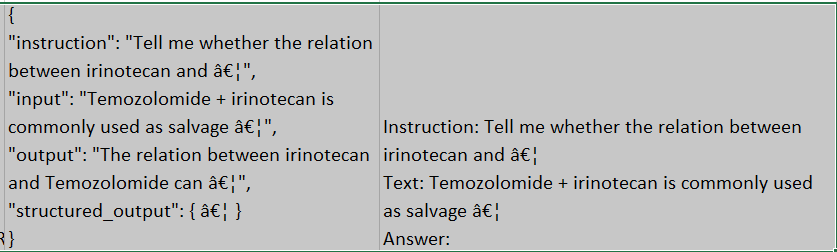

In [2]:
str_json = {
"instruction": "Tell me whether the relation between irinotecan and â€¦",
"input": "Temozolomide + irinotecan is commonly used as salvage â€¦",
"output": "The relation between irinotecan and Temozolomide can â€¦",
"structured_output": {}
}
str_json = replace_placeholders_within_json(str_json, "embase")
print(str_json)

Instruction: Tell me whether the relation between irinotecan and â€¦ 
Text: Temozolomide + irinotecan is commonly used as salvage â€¦ 
Answer: 


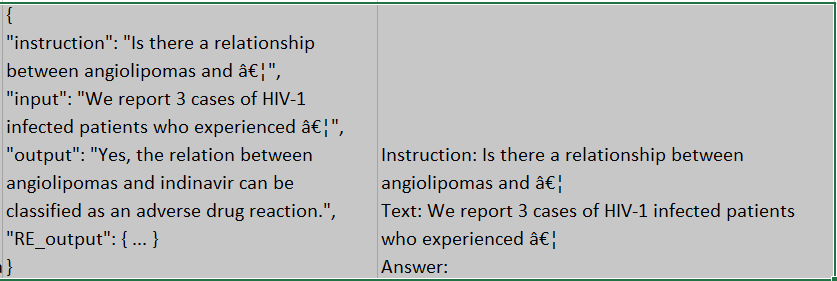

In [4]:
str_json = {
"instruction": "Is there a relationship between angiolipomas and â€¦",
"input": "We report 3 cases of HIV-1 infected patients who experienced â€¦",
"output": "Yes, the relation between angiolipomas and indinavir can be classified as an adverse drug reaction.",
"RE_output": {}
}
str_json = replace_placeholders_within_json(str_json, "pp")
print(str_json)

Instruction: Is there a relationship between angiolipomas and â€¦ 
Text: We report 3 cases of HIV-1 infected patients who experienced â€¦ 
Answer: 


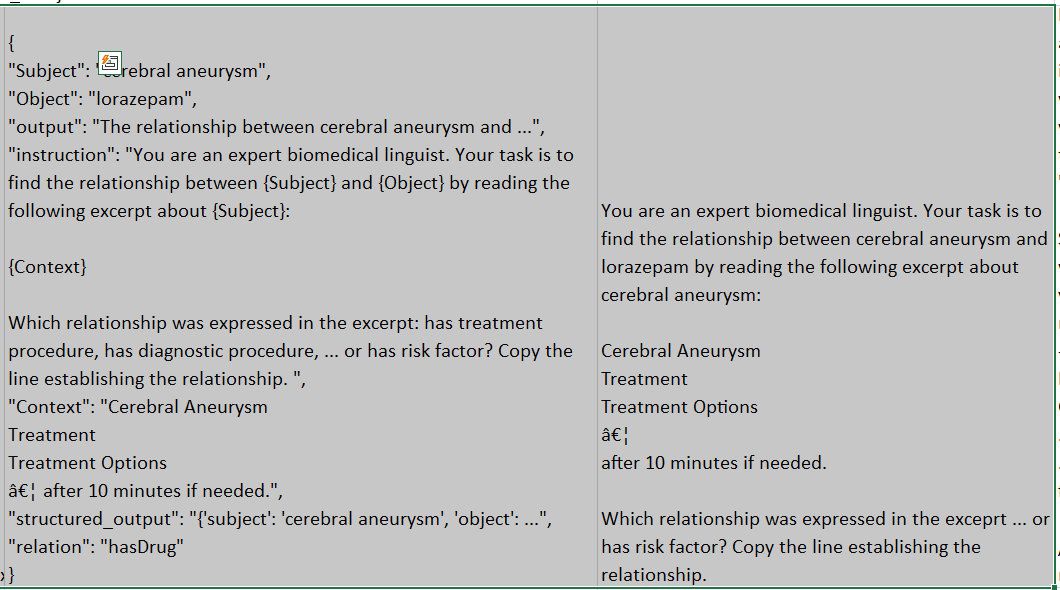

In [5]:
str_json = {
"Subject": "cerebral aneurysm",
"Object": "lorazepam",
"output": "The relationship between cerebral aneurysm and ...",
"instruction": """You are an expert biomedical linguist. Your task is to find the relationship between {Subject} and {Object} by reading the following excerpt about {Subject}:

{Context}

Which relationship was expressed in the excerpt: has treatment procedure, has diagnostic procedure, ... or has risk factor? Copy the line establishing the relationship. """,
"Context": "Cerebral Aneurysm \nTreatment \nTreatment Options \nâ€¦ \nafter 10 minutes if needed.",
"structured_output": {'subject': 'cerebral aneurysm', 'object': ""},
"relation": "hasDrug"
}
str_json = replace_placeholders_within_json(str_json, "clinical overview")
print(str_json)

You are an expert biomedical linguist. Your task is to find the relationship between cerebral aneurysm and lorazepam by reading the following excerpt about cerebral aneurysm:

Cerebral Aneurysm 
Treatment 
Treatment Options 
â€¦ 
after 10 minutes if needed.

Which relationship was expressed in the excerpt: has treatment procedure, has diagnostic procedure, ... or has risk factor? Copy the line establishing the relationship. 


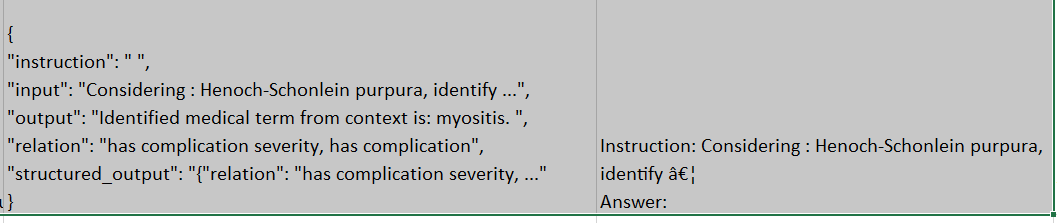

In [6]:
str_json = {
"instruction": " ",
"input": "Considering : Henoch-Schonlein purpura, identify ...",
"output": "Identified medical term from context is: myositis. ",
"relation": "has complication severity, has complication",
"structured_output": {"relation": "has complication severity, ..."}
}
str_json = replace_placeholders_within_json(str_json, "goldset")
print(str_json)

Instruction: Considering : Henoch-Schonlein purpura, identify ... 
Answer: 


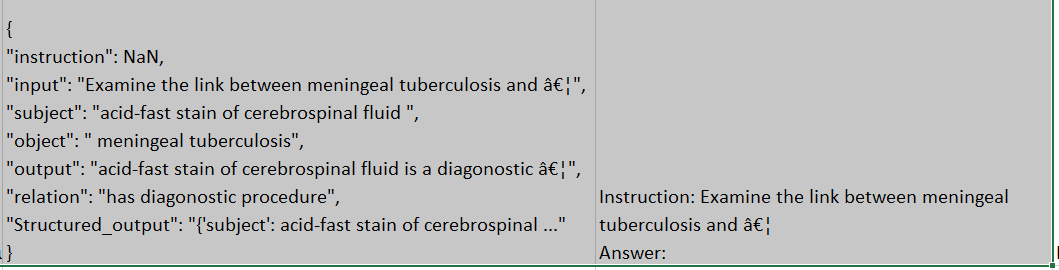

In [7]:
str_json = {
"instruction": np.NaN,
"input": "Examine the link between meningeal tuberculosis and â€¦",
"subject": "acid-fast stain of cerebrospinal fluid ",
"object": " meningeal tuberculosis",
"output": "acid-fast stain of cerebrospinal fluid is a diagonostic â€¦",
"relation": "has diagonostic procedure",
"Structured_output": {'subject': "acid-fast stain of cerebrospinal ..."}
}
str_json = replace_placeholders_within_json(str_json, "emmet")
print(str_json)

Instruction: Examine the link between meningeal tuberculosis and â€¦ 
Answer: 


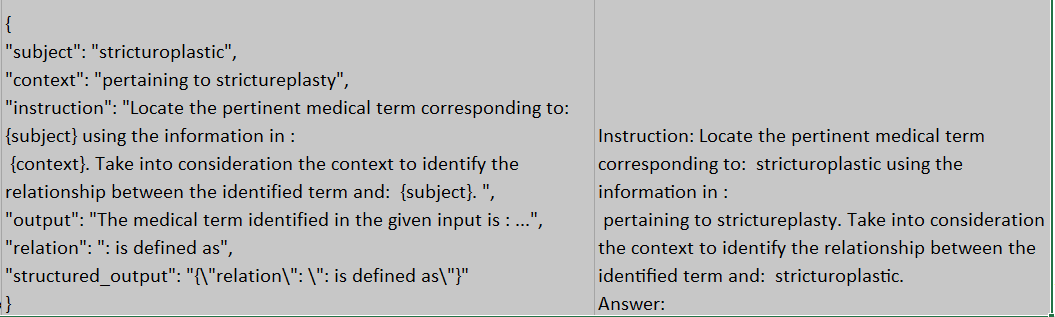

In [8]:
str_json = {
"subject": "stricturoplastic",
"context": "pertaining to strictureplasty",
"instruction": """Locate the pertinent medical term corresponding to:  {subject} using the information in : 
 {context}. Take into consideration the context to identify the relationship between the identified term and:  {subject}. """,
"output": "The medical term identified in the given input is : ...",
"relation": ": is defined as",
"structured_output": {"relation": ": is defined as"}
}
str_json = replace_placeholders_within_json(str_json, "dorland")
print(str_json)

Instruction: Locate the pertinent medical term corresponding to:  stricturoplastic using the information in : 
 pertaining to strictureplasty. Take into consideration the context to identify the relationship between the identified term and:  stricturoplastic.  
Answer: 


## Open Book QA

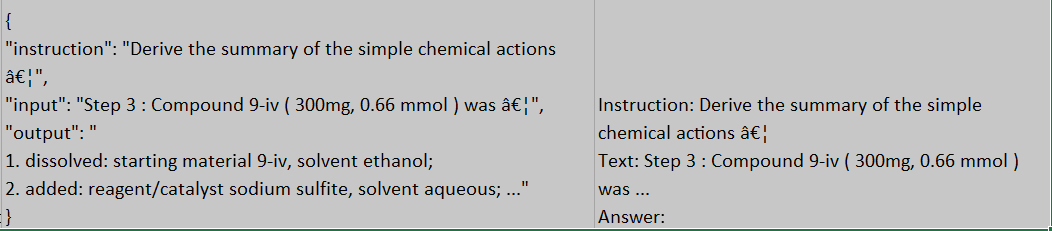

In [9]:
str_json = {
"instruction": "Derive the summary of the simple chemical actions â€¦",
"input": "Step 3 : Compound 9-iv ( 300mg, 0.66 mmol ) was â€¦",
"output": """
1. dissolved: starting material 9-iv, solvent ethanol; 
2. added: reagent/catalyst sodium sulfite, solvent aqueous; ..."""
}
str_json = replace_placeholders_within_json(str_json, "Reaxys Recipe Extraction")
print(str_json)

Instruction: Derive the summary of the simple chemical actions â€¦ 
Text: Step 3 : Compound 9-iv ( 300mg, 0.66 mmol ) was â€¦ 
Answer: 


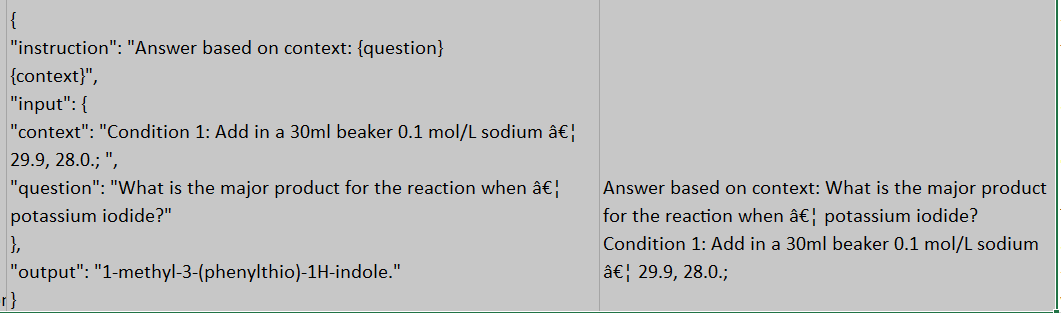

In [10]:
str_json = {
"instruction": """Answer based on context: {question} 
{context}""",
"input": {
"context": "Condition 1: Add in a 30ml beaker 0.1 mol/L sodium â€¦ 29.9, 28.0.; ",
"question": "What is the major product for the reaction when â€¦ potassium iodide?"
},
"output": "1-methyl-3-(phenylthio)-1H-indole."
}
str_json = replace_placeholders_within_json(str_json, "Reaxys Condition Prediction")
print(str_json)

Answer based on context: What is the major product for the reaction when â€¦ potassium iodide? 
Condition 1: Add in a 30ml beaker 0.1 mol/L sodium â€¦ 29.9, 28.0.; 


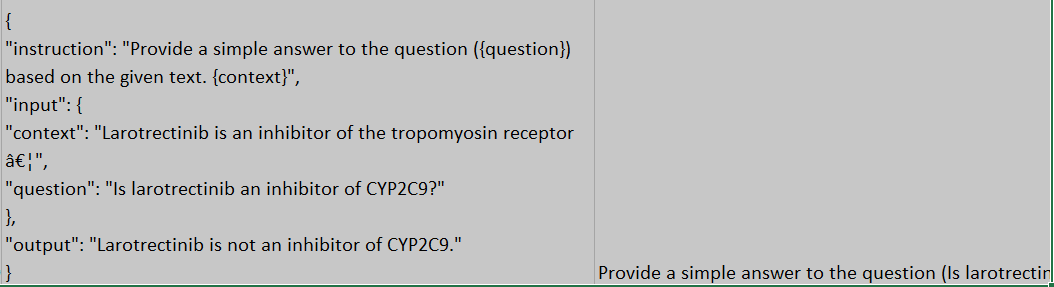

In [11]:
str_json = {
"instruction": "Provide a simple answer to the question ({question}) based on the given text. {context}",
"input": {
"context": "Larotrectinib is an inhibitor of the tropomyosin receptor â€¦",
"question": "Is larotrectinib an inhibitor of CYP2C9?"
},
"output": "Larotrectinib is not an inhibitor of CYP2C9."
}
str_json = replace_placeholders_within_json(str_json, "biology")
print(str_json)

Provide a simple answer to the question (Is larotrectinib an inhibitor of CYP2C9?) based on the given text. Larotrectinib is an inhibitor of the tropomyosin receptor â€¦


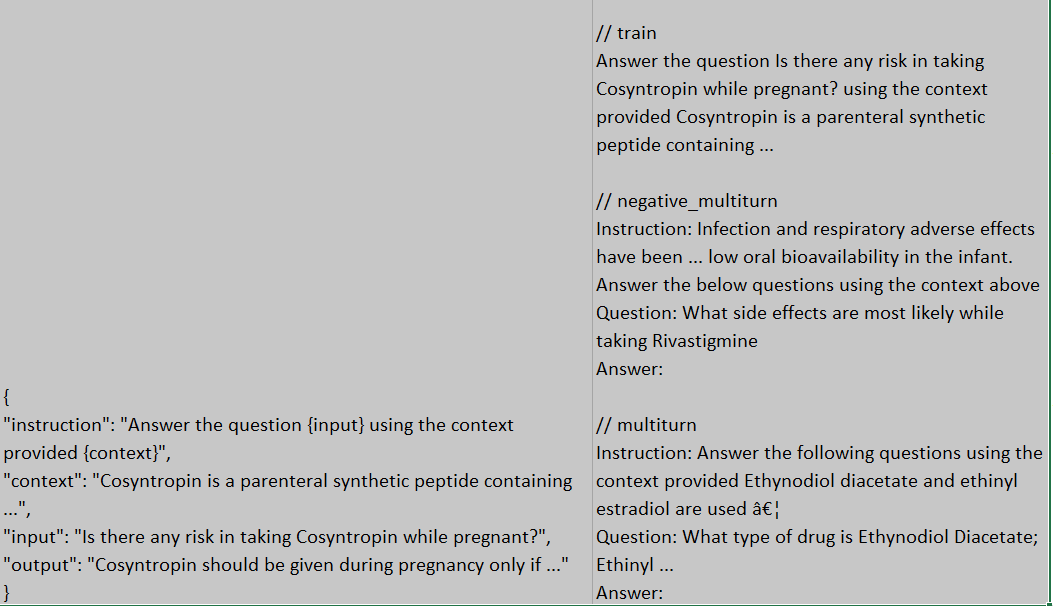

In [12]:
str_json = {
"instruction": "Answer the question {input} using the context provided {context}",
"context": "Cosyntropin is a parenteral synthetic peptide containing ...",
"input": "Is there any risk in taking Cosyntropin while pregnant?",
"output": "Cosyntropin should be given during pregnancy only if ..."
}

str_json = replace_placeholders_within_json(str_json, "drug monograph")
print(str_json)

Answer the question Is there any risk in taking Cosyntropin while pregnant? using the context provided Cosyntropin is a parenteral synthetic peptide containing ...


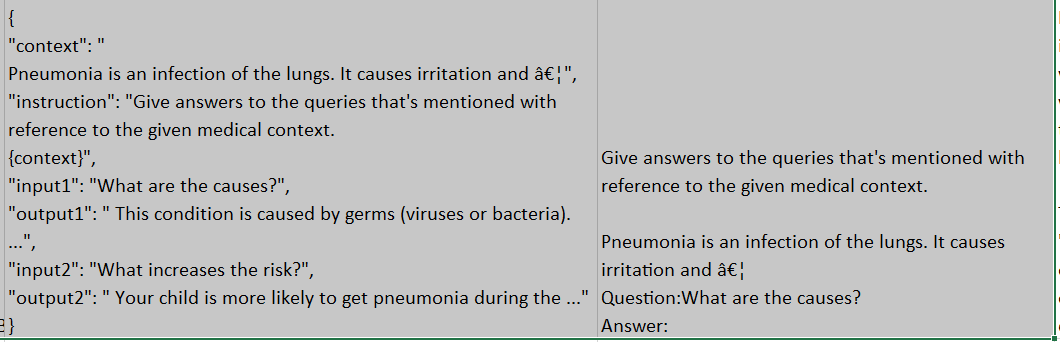

In [13]:
str_json = {
"context": "Pneumonia is an infection of the lungs. It causes irritation and â€¦",
"instruction": """Give answers to the queries that's mentioned with reference to the given medical context. 
{context}""",
"input1": "What are the causes?",
"output1": " This condition is caused by germs (viruses or bacteria). ...",
"input2": "What increases the risk?",
"output2": " Your child is more likely to get pneumonia during the ..."
}
str_json = replace_placeholders_within_json(str_json)
print(str_json)

Give answers to the queries that's mentioned with reference to the given medical context. 
Pneumonia is an infection of the lungs. It causes irritation and â€¦ 
Question: What are the causes? 
Answer: 


### Extra --- for other Categories

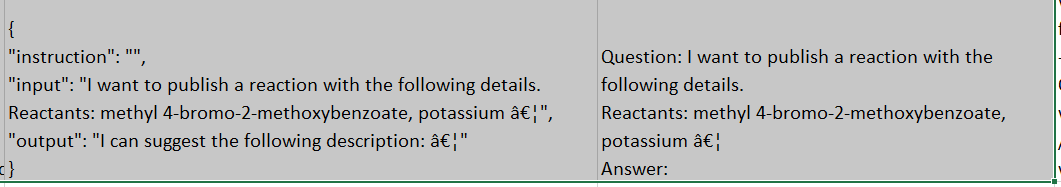

In [3]:
str_json = {
"instruction": "",
"input": """I want to publish a reaction with the following details.
Reactants: methyl 4-bromo-2-methoxybenzoate, potassium â€¦""",
"output": "I can suggest the following description: â€¦"
}
str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: I want to publish a reaction with the following details.
Reactants: methyl 4-bromo-2-methoxybenzoate, potassium â€¦
Answer: 


In [4]:
str_json = {
"instruction": "Analyze the text and note below all the starting â€¦",
"input": "Text: Step 2 : Preparation of (4-(3-hydroxyprop-1-â€¦",
"output": "Entities: starting materials: (4-bromophenyl)(morâ€¦"
}

str_json = replace_placeholders_within_json(str_json, "")
print(str_json)

Instruction: Analyze the text and note below all the starting â€¦ 
Text: Text: Step 2 : Preparation of (4-(3-hydroxyprop-1-â€¦ 
Answer: 


In [140]:
str_json = {
"instruction": "Please list all entity words in the text. Options: diseases.",
"input": "Methods: A multicenter, prospective (2015\u0432\u0402â€¦",
"output": "diseases: 'trauma'.",
"structured_output": "{ â€¦ }",
"entity_type": "disease"
}
str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: Please list all entity words in the text. Options: diseases. 
Text: Methods: A multicenter, prospective (2015вЂâ€¦ 
Answer: 


In [141]:
str_json = {
"instruction": "What are the named entities in the text snippet given below? Options:\u00a0disease. Formulate a sentence from entities and their types.",
"input": "OBJECTIVE: To report a case of toxin-positive â€¦",
"output": "Output: In the text above toxin-positive ...",
"structured_output": "...",
"entity_types_in_instruction": []
}
str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: What are the named entities in the text snippet given below? Options: disease. Formulate a sentence from entities and their types. 
Text: OBJECTIVE: To report a case of toxin-positive â€¦ 
Answer: 


In [142]:
str_json = {
"input": "The surgery is done through the front anterior part â€¦",
"instruction": "Can you answer by producing a list of procedures â€¦",
"entity_type_in_instruction": "['procedures']",
"structured_output": "{\"procedures\", [\"surgery\"]}",
"output": "The list of procedures from the below text are  'procedures': ['surgery'] "
}
str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: Can you answer by producing a list of procedures â€¦ 
Text: The surgery is done through the front anterior part â€¦ 
Answer: 


In [143]:
str_json = {
"input": "Nephritic syndrome occurs as a spectrum from mild (eg, â€¦",
"instruction": "Describe in detail all the diseases and ...",
"structured_output": {" diseases": "Nephritic syndrome"},
"output": "Identified diseases and symptoms from the input are: â€¦"
}

str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: Describe in detail all the diseases and ... 
Text: Nephritic syndrome occurs as a spectrum from mild (eg, â€¦ 
Answer: 


In [153]:
str_json = {
"context": "Infection and respiratory adverse effects have been ... low oral bioavailability in the infant.",
"instruction": "{context} Answer the below questions using the context given above",
"input1": "What side effects are most likely while taking Rivastigmine",
"output1": "This question cannot be answered based on the context provided",
"input2": "What is Rivastigmine used for?",
"output2": "This question cannot be answered based on the context provided",
}
str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: Infection and respiratory adverse effects have been ... low oral bioavailability in the infant. Answer the below questions using the context given above 
Text: What side effects are most likely while taking Rivastigmine 
Answer: 


In [154]:
str_json = {
"context": "Ethynodiol diacetate and ethinyl estradiol are used â€¦",
"instruction": "Answer the following questions using the context provided {context}",
"input1": "What type of drug is Ethynodiol Diacetate; Ethinyl ...",
"output1": "Ethynodiol diacetate and ethinyl estradiol is a potent ...",
"intput2": "What is the guidance on taking Ethynodiol Diacetate; ...",
"output2": "Manufacturers recommend avoidance of combined ...",
}
str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: Answer the following questions using the context provided Ethynodiol diacetate and ethinyl estradiol are used â€¦ 
Text: What type of drug is Ethynodiol Diacetate; Ethinyl ... 
Answer: 


In [157]:
str_json = {
"instruction": "",
"input": "Generate me SMILES for an isomer of the molecule with â€¦",
"output": "CC1=C(C2=NCâ€¦"
}

str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: Generate me SMILES for an isomer of the molecule with â€¦
Answer: 


In [158]:
str_json = {
"instruction": "",
"input": "Which reaction type is able to convert \u03b1-amino â€¦",
"output": "The Knorr Pyrrole Synthesis is a well-known reaction â€¦"
}

str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: Which reaction type is able to convert α-amino â€¦
Answer: 


In [159]:
str_json = {
"instruction": "",
"input": "Is Enterobacter cloacae 140 directly related to Enterobacter?",
"output": "No, although Enterbacter cloacae 140 is not directly â€¦"
}
str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: Is Enterobacter cloacae 140 directly related to Enterobacter?
Answer: 


In [160]:
str_json = {
"instruction": "",
"input": "What laboratory and diagnostic tests should be performed as part of hypertension evaluation?",
"output": "Although there appears to be some general consensus â€¦"
}
str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: What laboratory and diagnostic tests should be performed as part of hypertension evaluation?
Answer: 


In [161]:
str_json = {
"instruction": "",
"input": "What conditions does Trastuzumab treat?",
"output": "Trastuzumab is commonly used to treat breast cancer â€¦"
}
str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: What conditions does Trastuzumab treat?
Answer: 


In [162]:
str_json = {
"input1": "Would a physician specializing in internal medicine be â€¦",
"output1": "Yes, a physician specializing in internal medicine â€¦",
"input2": "Physicians specializing in which other fields may be ideal â€¦",
"output2": "Other physician specialties ideal for treating primary ...",
"instruction": ""
}
str_json = replace_placeholders_within_json(str_json)
print(str_json)

****************************
None


In [163]:
str_json = {
"input": "Is bipolar disorder managed with electroconvulsive therapy?",
"output": "electroconvulsive therapy can be used in the management ...",
"instruction": ""
}
str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: Is bipolar disorder managed with electroconvulsive therapy?
Answer: 


In [164]:
str_json = {
"instruction": "Find the correct solution from the alternatives {choices} for the problem raised in the question {input}.",
"input": "A 29-year-old male comes to the office because of a tenderâ€¦",
"choices": "1) Ampicillin/sulbactam \u00a0 \u00a0\u00a0 | 2) ...",
"output": {
"answer": "4",
"rationale": "Erysipelas is a common bacterial skin infection that is ..."
}
}
str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: Find the correct solution from the alternatives 1) Ampicillin/sulbactam      | 2) ... for the problem raised in the question A 29-year-old male comes to the office because of a tenderâ€¦. 
Text: A 29-year-old male comes to the office because of a tenderâ€¦ 
Answer: 


In [165]:
str_json = {
"instruction": "Determine all appropriate responses from the set of options {choices} for the question being asked {input}.",
"input": "Which immediate action would the nurse take when â€¦",
"choices": "CHOICE_000) Applying pressure to the dressing over the site | CHOICE_001) Removing the catheter and preserving it for ...",
"output": {
"answer": "CHOICE_001, CHOICE_002, CHOICE_004",
"rationale": "The assessment findings show a possibility of infection; ..."
}
}
str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: Determine all appropriate responses from the set of options CHOICE_000) Applying pressure to the dressing over the site | CHOICE_001) Removing the catheter and preserving it for ... for the question being asked Which immediate action would the nurse take when â€¦. 
Text: Which immediate action would the nurse take when â€¦ 
Answer: 


In [166]:
str_json = {
"instruction": "Take a look at the alternatives {choices} and answers the following question correctly {input}.",
"input": "Place the steps in the transformation of normal cells into cancerous cells in the correct order.",
"choices": "CHOICE_000) Promotion | CHOICE_001) Initiation |... Progression",
"output": {
"answer": "CHOICE_001, CHOICE_000, CHOICE_003, CHOICE_002",
"rationale": "Initiation, promotion, progression, and metastasis ..."
}
}
str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: Take a look at the alternatives CHOICE_000) Promotion | CHOICE_001) Initiation |... Progression and answers the following question correctly Place the steps in the transformation of normal cells into cancerous cells in the correct order.. 
Text: Place the steps in the transformation of normal cells into cancerous cells in the correct order. 
Answer: 


In [167]:
str_json = {
"instruction": "Determine which alternative best suits the question {input} and choose it from the options provided {choices}.",
"input": "Which nutrient plays a role in maintaining fluid balance, â€¦",
"choices": "CHOICE_000) Fat | CHOICE_001) Protein | CHOICE_002) ... Cabohydrate",
"output": {
"answer": "CHOICE_001",
"rationale": "Protein plays a role in maintaining fluid balance, ..."
}
}
str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: Determine which alternative best suits the question Which nutrient plays a role in maintaining fluid balance, â€¦ and choose it from the options provided CHOICE_000) Fat | CHOICE_001) Protein | CHOICE_002) ... Cabohydrate. 
Text: Which nutrient plays a role in maintaining fluid balance, â€¦ 
Answer: 


In [168]:
str_json = {
"instruction": """
 {Question} 
 {Options}""",
"Question": "Genetic mapping is the first step in identifying the ...",
"Options": "A. The lociare lessthan 50 centimorgans apart,B. ..."
}
str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: 
 Genetic mapping is the first step in identifying the ... 
 A. The lociare lessthan 50 centimorgans apart,B. ... 
Answer: 


In [169]:
str_json = {
"instruction": """Which choice correctly resolves the query?
 {Question} 
 {Options}""",
"Question": "A 59-year-old man with a significant family history of â€¦",
"Options": "A. Sodium channels in the late distal tubule and â€¦",
"output": "None of the presented options suitably answers the ..."
}
str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: Which choice correctly resolves the query?
 A 59-year-old man with a significant family history of â€¦ 
 A. Sodium channels in the late distal tubule and â€¦ 
Answer: 


In [170]:
str_json = {
"instruction": """
 {Question}
 {Options}""",
"Question": "A biochemist is preparing a lecture on the regulation ...",
"Options" : "A.Glycogen phosphorylase,B.Glycogen synthase,..."
}
str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: 
 A biochemist is preparing a lecture on the regulation ...
 A.Glycogen phosphorylase,B.Glycogen synthase,... 
Answer: 


In [171]:
str_json = {
"instruction": "The abstract tells the reader in a few sentences what â€¦",
"input": "Headspace analyses of 2 H labeling of acetone: Enabling â€¦ isotopomers may be important.",
"output": ""
}
str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: The abstract tells the reader in a few sentences what â€¦ 
Text: Headspace analyses of 2 H labeling of acetone: Enabling â€¦ isotopomers may be important. 
Answer: 


In [172]:
str_json = {
"instruction": "Write a short abstract of the following passage",
"input": "The complement system refers to a group of plasma â€¦",
"output": "The complement system is a group of proteins that help â€¦"
}
str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: Write a short abstract of the following passage 
Text: The complement system refers to a group of plasma â€¦ 
Answer: 


In [173]:
str_json = {
"input": "Electrical discharges operated at low pressures DC discharges are the simplest kind of electrical discharges ...",
"instruction": "You are a medical expert, please summarize below ...",
"output": "It has been shown that there are difference ways to ..."
}

str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: You are a medical expert, please summarize below ... 
Text: Electrical discharges operated at low pressures DC discharges are the simplest kind of electrical discharges ... 
Answer: 


In [174]:
str_json = {
"instruction": "Refer provided text and In a few brief sentences, â€¦",
"input": "This sheet gives you information about how to care for â€¦",
"output": "After the procedure, it is common to have a dry mouth, â€¦"
}

str_json = replace_placeholders_within_json(str_json)
print(str_json)

Instruction: Refer provided text and In a few brief sentences, â€¦ 
Text: This sheet gives you information about how to care for â€¦ 
Answer: 
